In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
import scape
import katdal
import katpoint
import katsdpscripts
import glob
import re
import pandas as pd 

import csv
import operator

In [10]:
from os import system

In [11]:
print "Scape version: %s"%scape.__version__
print "katdal version: %s"%katdal.__version__
print "katpoint version: %s"%katpoint.__version__
print "katsdpscripts version: %s"%katsdpscripts.__version__

Scape version: 0.1.dev616+master.e836eb2
katdal version: 0.9.6.dev657+master.1e4b378
katpoint version: 0.8.dev355+master.341001f
katsdpscripts version: 0.1.dev2752+master.d23625e


In [13]:
!ls /var/kat/archive3/data/MeerKATAR1/telescope_products/2018/03/18/1521363834.h5 

/var/kat/archive3/data/MeerKATAR1/telescope_products/2018/03/18/1521363834.h5


In [31]:
h5_filename ='/var/kat/archive3/data/MeerKATAR1/telescope_products/2018/03/18/1521363834.h5'
%set_env h5_filename = $h5_filename

env: h5_filename=/var/kat/archive3/data/MeerKATAR1/telescope_products/2018/03/18/1521363834.h5


In [33]:
d = katdal.open('/var/kat/archive3/data/MeerKATAR1/telescope_products/2018/03/18/1521363834.h5')
ant_list= []
[ant_list.append(ant.name) for ant in d.ants]
print(ant_list)

DEBUG: Found int_time=7.9966169712 in telstate['sdp_l0_int_time']
DEBUG: Found scale_factor_timestamp=1712000000.0 in telstate[u'i0_scale_factor_timestamp']
DEBUG: Found sync_time=1521356781.0 in telstate[u'i0_sync_time']
DEBUG: Found n_chans=4096 in telstate['sdp_l0_n_chans']
DEBUG: Found bandwidth=856000000.0 in telstate['sdp_l0_bandwidth']
DEBUG: Found center_freq=1284000000.0 in telstate['sdp_l0_center_freq']
['m005', 'm020', 'm021', 'm022', 'm025', 'm027', 'm028', 'm038']


In [34]:
ant_list.remove('m025') # not tracking most of the time
ants=','.join(ant_list)
print ants
%set_env ants=$ants

m005,m020,m021,m022,m027,m028,m038
env: ants=m005,m020,m021,m022,m027,m028,m038


In [35]:
ref_ant='m005'
%set_env ref_ant=$ref_ant

env: ref_ant=m005



Loading and processing data...

DEBUG: Found int_time=7.9966169712 in telstate['sdp_l0_int_time']
DEBUG: Found scale_factor_timestamp=1712000000.0 in telstate[u'i0_scale_factor_timestamp']
DEBUG: Found sync_time=1521356781.0 in telstate[u'i0_sync_time']
DEBUG: Found n_chans=4096 in telstate['sdp_l0_n_chans']
DEBUG: Found bandwidth=856000000.0 in telstate['sdp_l0_bandwidth']
DEBUG: Found center_freq=1284000000.0 in telstate['sdp_l0_center_freq']
antennas (7): m005 (*ref*), m020, m021, m022, m027, m028, m038 [pol H]
baselines (21): 0-1 0-2 1-2 0-3 1-3 2-3 1-4 2-4 3-4 2-5 3-5 4-5 3-6 4-6 5-6 0-4 0-5 0-6 1-5 1-6 2-6
scan   0 (   6 samples) skipped 'slew'
scan   1 (  47 samples) 0.058 0.060 0.061 0.053 0.058 0.051 0.061 0.076 0.073 0.062 0.057 0.065 0.058 0.064 0.053 0.070 0.054 0.057 0.052 0.053 0.057 '0008-421'
scan   2 (   4 samples) skipped 'slew'
scan   3 (  50 samples) 0.028 0.029 0.029 0.027 0.030 0.024 0.030 0.033 0.037 0.028 0.030 0.031 0.028 0.034 0.026 0.035 0.026 0.027 0.022 0.

scan  77 (  16 samples) 0.045 0.045 0.041 0.044 0.043 0.043 0.114 0.118 0.115 0.043 0.043 0.116 0.046 0.126 0.046 0.122 0.045 0.047 0.042 0.045 0.045 '2155-152'
scan  78 (   2 samples) skipped 'slew'
scan  79 (  15 samples) 0.027 0.027 0.025 0.027 0.026 0.026 0.064 0.063 0.066 0.027 0.025 0.067 0.028 0.067 0.028 0.067 0.027 0.028 0.025 0.027 0.027 '2203-188'
scan  80 (   4 samples) skipped 'slew'
scan  81 (  15 samples) 0.025 0.025 0.024 0.025 0.025 0.025 0.097 0.096 0.098 0.025 0.025 0.096 0.026 0.106 0.027 0.102 0.027 0.026 0.025 0.026 0.026 'CTA102'
scan  82 (   3 samples) skipped 'slew'
scan  83 (  15 samples) 0.011 0.011 0.010 0.011 0.010 0.011 0.041 0.041 0.042 0.011 0.011 0.043 0.011 0.044 0.011 0.043 0.011 0.012 0.011 0.011 0.011 '3C454.3'
scan  84 (   6 samples) skipped 'slew'
scan  85 (  15 samples) 0.059 0.060 0.056 0.062 0.058 0.058 0.092 0.095 0.089 0.058 0.057 0.090 0.062 0.097 0.062 0.096 0.062 0.065 0.056 0.060 0.062 '2259-375'
scan  86 (   3 samples) skipped 'slew'
sca

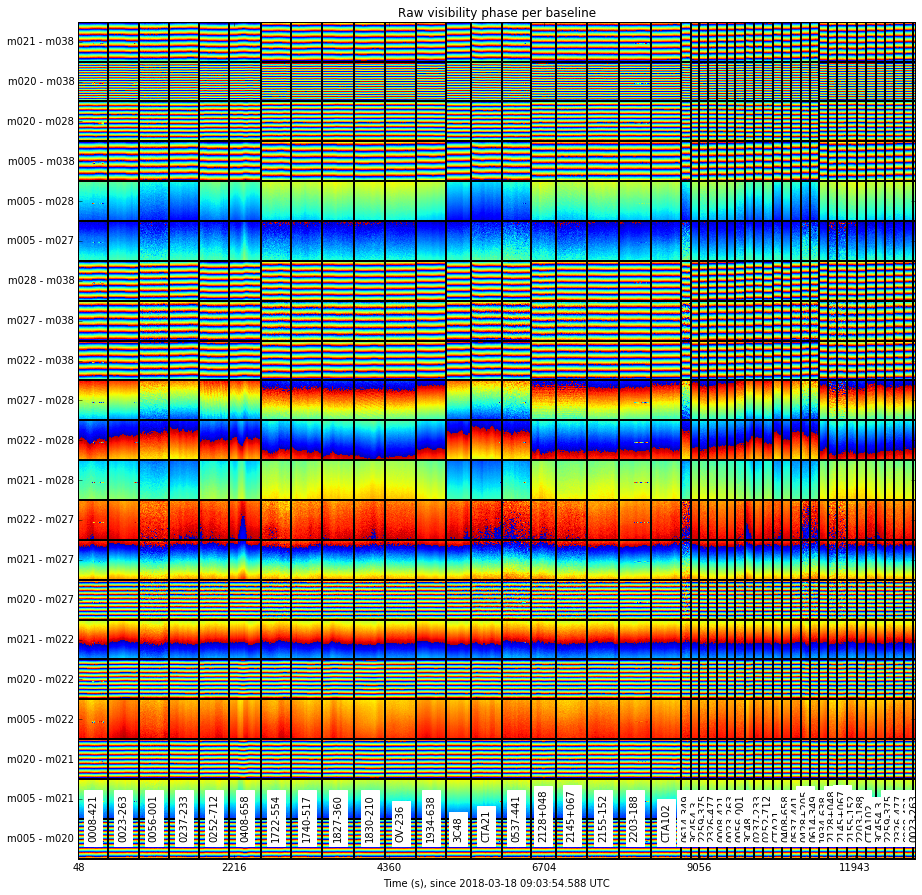

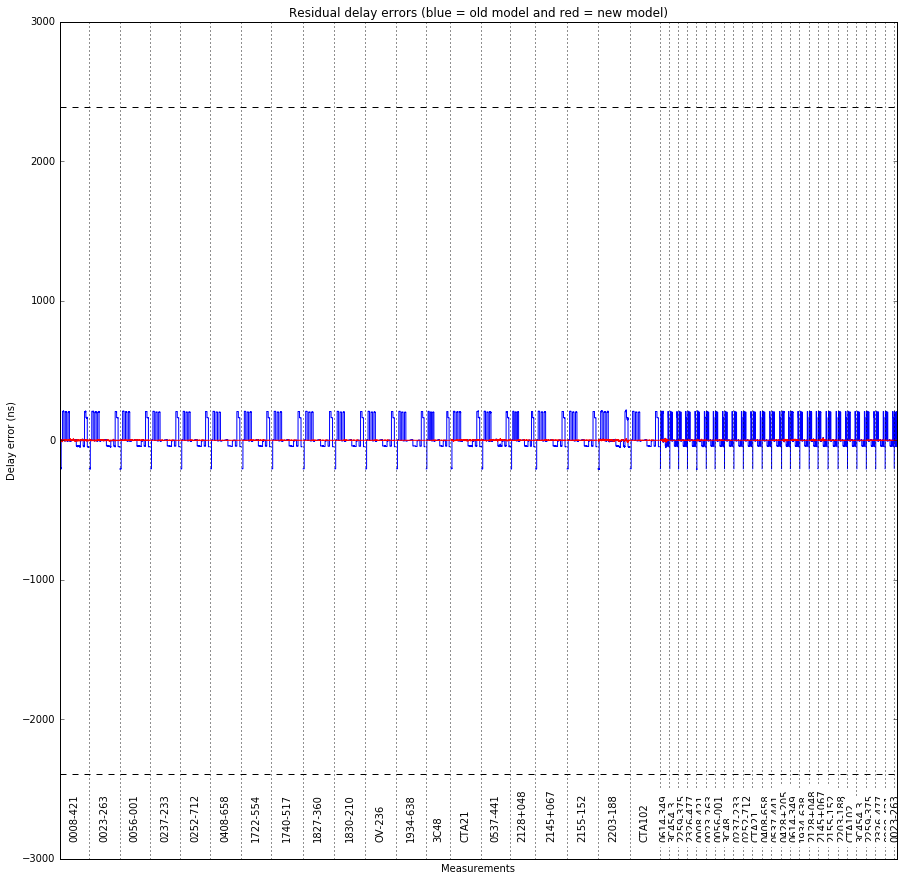

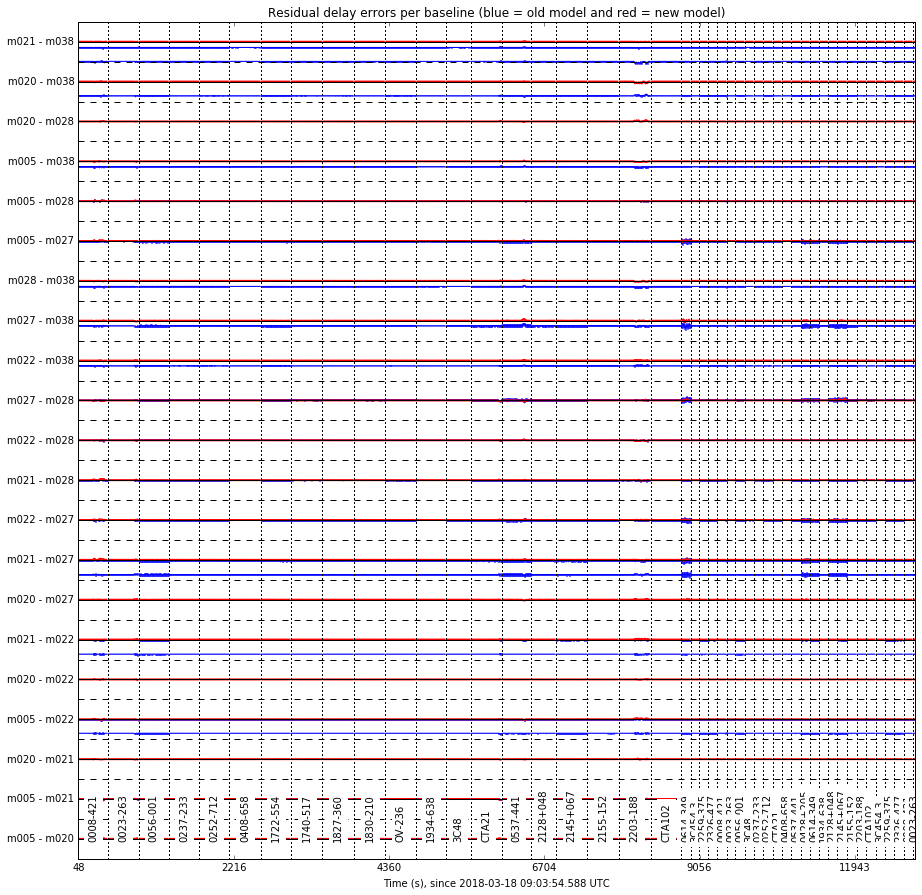

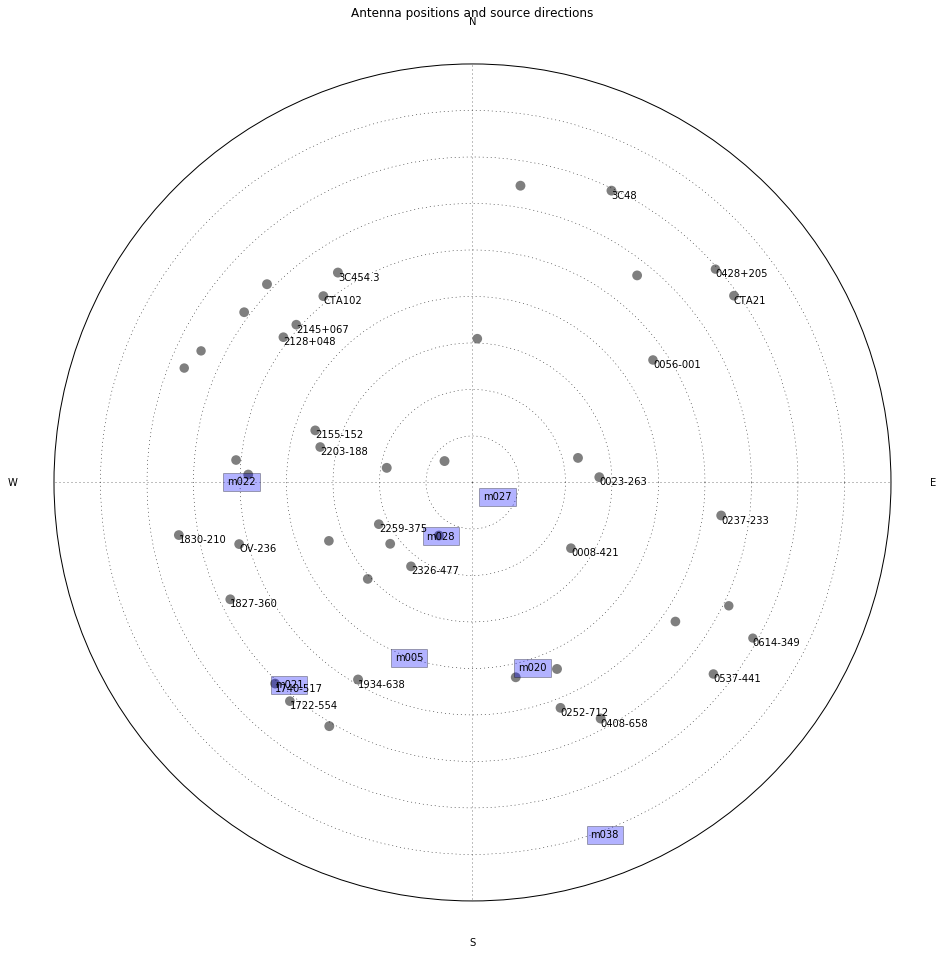

In [36]:
figure(1,figsize=(15,15))
figure(2,figsize=(15,15))
figure(3,figsize=(15,15))
figure(4,figsize=(15,15))
%run /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'H' -r $ref_ant \
 -a $ants $h5_filename



Loading and processing data...

DEBUG: Found int_time=7.9966169712 in telstate['sdp_l0_int_time']
DEBUG: Found scale_factor_timestamp=1712000000.0 in telstate[u'i0_scale_factor_timestamp']
DEBUG: Found sync_time=1521356781.0 in telstate[u'i0_sync_time']
DEBUG: Found n_chans=4096 in telstate['sdp_l0_n_chans']
DEBUG: Found bandwidth=856000000.0 in telstate['sdp_l0_bandwidth']
DEBUG: Found center_freq=1284000000.0 in telstate['sdp_l0_center_freq']
antennas (7): m005 (*ref*), m020, m021, m022, m027, m028, m038 [pol V]
baselines (21): 0-1 0-2 1-2 0-3 1-3 2-3 1-4 2-4 3-4 2-5 3-5 4-5 3-6 4-6 5-6 0-4 0-5 0-6 1-5 1-6 2-6
scan   0 (   6 samples) skipped 'slew'
scan   1 (  47 samples) 0.057 0.062 0.058 0.054 0.055 0.053 0.068 0.075 0.070 0.059 0.055 0.072 0.056 0.064 0.055 0.070 0.056 0.057 0.052 0.054 0.058 '0008-421'
scan   2 (   4 samples) skipped 'slew'
scan   3 (  50 samples) 0.028 0.027 0.029 0.025 0.028 0.031 0.035 0.035 0.037 0.028 0.029 0.034 0.029 0.037 0.028 0.039 0.027 0.027 0.023 0.

scan  83 (  15 samples) 0.014 0.013 0.013 0.014 0.013 0.013 0.050 0.050 0.051 0.014 0.014 0.053 0.013 0.053 0.014 0.052 0.015 0.014 0.014 0.014 0.014 '3C454.3'
scan  84 (   6 samples) skipped 'slew'
scan  85 (  15 samples) 0.066 0.067 0.064 0.066 0.065 0.063 0.106 0.103 0.100 0.067 0.066 0.106 0.067 0.107 0.070 0.107 0.072 0.070 0.067 0.067 0.068 '2259-375'
scan  86 (   3 samples) skipped 'slew'
scan  87 (  15 samples) 0.067 0.058 0.061 0.064 0.059 0.060 0.093 0.088 0.090 0.062 0.057 0.094 0.061 0.090 0.065 0.090 0.062 0.063 0.065 0.062 0.061 '2326-477'
scan  88 (   3 samples) skipped 'slew'
scan  89 (  15 samples) 0.041 0.042 0.040 0.041 0.039 0.040 0.051 0.049 0.050 0.040 0.040 0.051 0.040 0.052 0.041 0.050 0.040 0.041 0.041 0.040 0.040 '0008-421'
scan  90 (   5 samples) skipped 'slew'
scan  91 (   4 samples) 0.021 0.021 0.020 0.021 0.021 0.020 0.026 0.025 0.025 0.022 0.021 0.025 0.021 0.025 0.021 0.026 0.021 0.021 0.022 0.022 0.021 '0023-263'
scan  92 (   1 samples) skipped 'slew'



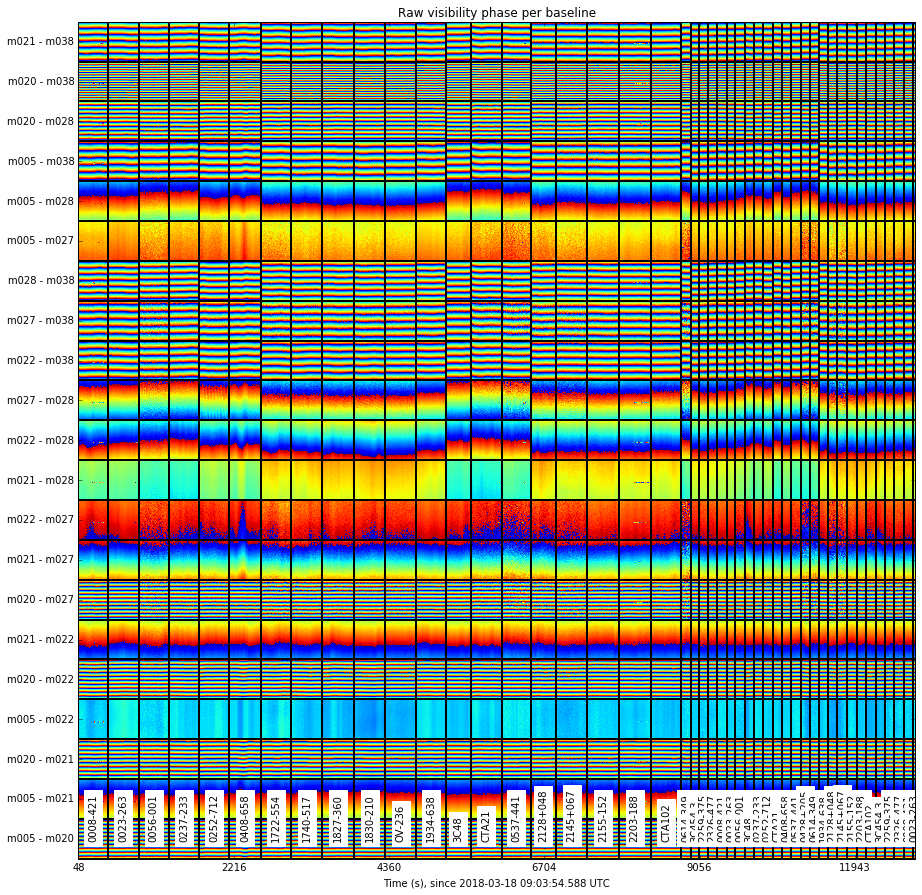

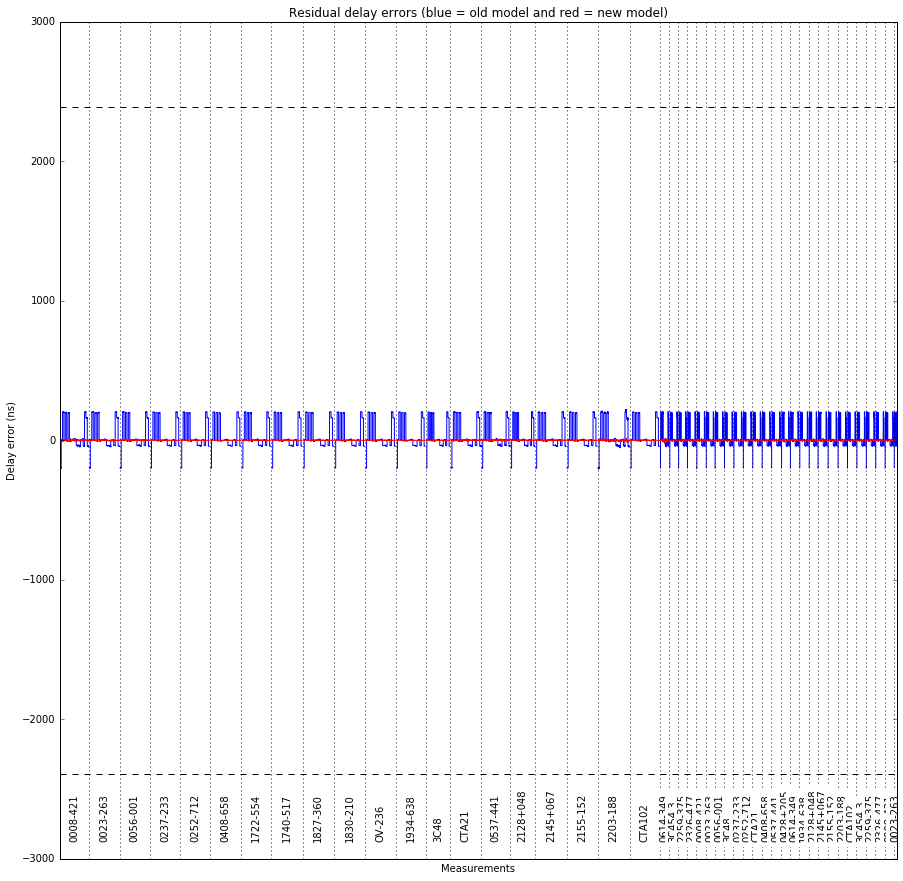

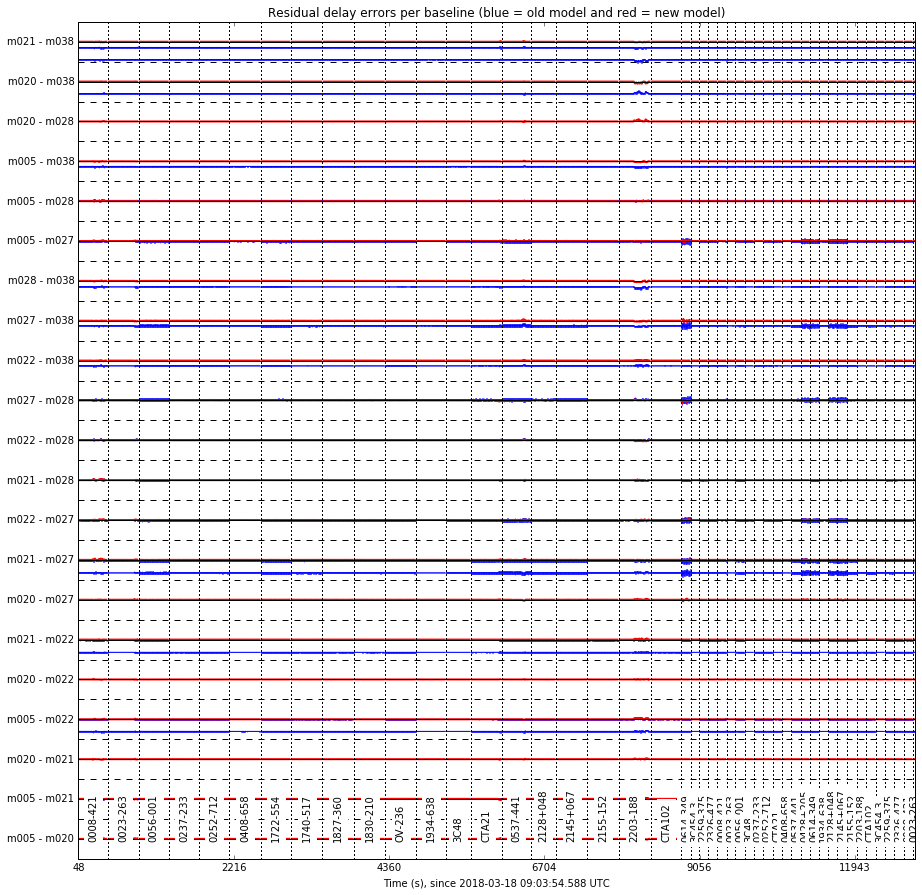

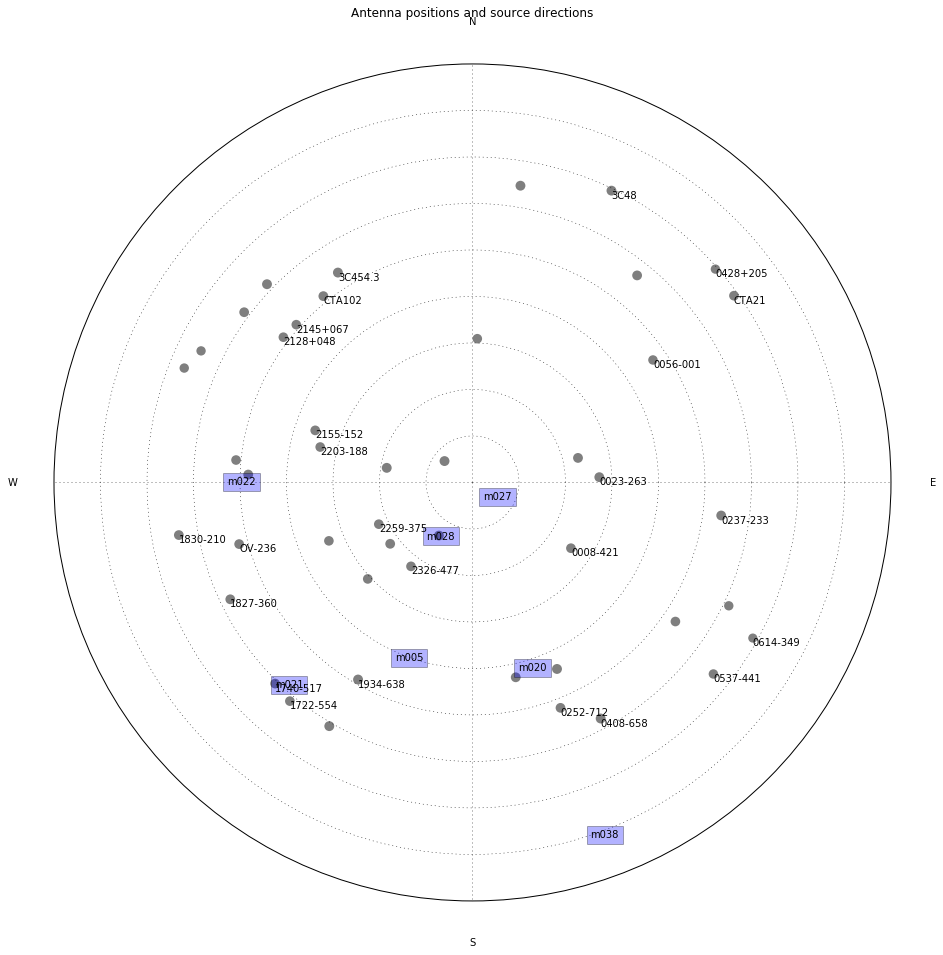

In [37]:
figure(1,figsize=(15,15))
figure(2,figsize=(15,15))
figure(3,figsize=(15,15))
figure(4,figsize=(15,15))
%run -e /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'V' -r $ref_ant \
 -a $ants $h5_filename


In [38]:
res_h = !python /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'H' -r $ref_ant \
  -a $ants  $h5_filename
print "Done H"

Done H


In [39]:
res_v = !python /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'V' -r $ref_ant \
  -a $ants $h5_filename
print "Done V"

Done V


In [40]:
delays_h = {}
for i,r in enumerate(res_h):
    if r.startswith('Antenna'):
        ant = r[8:12]
        delays_h[ant] = {}
        delays_h[ant]['E'] = float(res_h[i+2].split(':')[1].lstrip().split(' ')[0])
        delays_h[ant]['N'] = float(res_h[i+3].split(':')[1].lstrip().split(' ')[0])
        delays_h[ant]['U'] = float(res_h[i+4].split(':')[1].lstrip().split(' ')[0])
        delays_h[ant]['D'] = float(res_h[i+5].split(':')[1].lstrip().split(' ')[0])
delays_h

{'m005': {'D': 5877.82, 'E': -102.088, 'N': -283.12, 'U': 1.475},
 'm020': {'D': 5837.131, 'E': 97.018, 'N': -299.638, 'U': 2.479},
 'm021': {'D': 5889.08, 'E': -295.959, 'N': -327.242, 'U': 0.711},
 'm022': {'D': 5874.933, 'E': -372.998, 'N': 0.544, 'U': -1.757},
 'm027': {'D': 5865.755, 'E': 40.476, 'N': -23.111, 'U': 0.223},
 'm028': {'D': 5870.792, 'E': -51.175, 'N': -87.171, 'U': 0.206},
 'm038': {'D': 5871.127, 'E': 213.318, 'N': -569.081, 'U': 4.56}}

In [41]:
delays_v = {}
for i,r in enumerate(res_v):
    if r.startswith('Antenna'):
        ant = r[8:12]
        delays_v[ant] = {}
        delays_v[ant]['E'] = float(res_v[i+2].split(':')[1].lstrip().split(' ')[0])
        delays_v[ant]['N'] = float(res_v[i+3].split(':')[1].lstrip().split(' ')[0])
        delays_v[ant]['U'] = float(res_v[i+4].split(':')[1].lstrip().split(' ')[0])
        delays_v[ant]['D'] = float(res_v[i+5].split(':')[1].lstrip().split(' ')[0])
delays_v

{'m005': {'D': 5878.919, 'E': -102.088, 'N': -283.12, 'U': 1.475},
 'm020': {'D': 5838.274, 'E': 97.017, 'N': -299.638, 'U': 2.479},
 'm021': {'D': 5890.081, 'E': -295.958, 'N': -327.242, 'U': 0.709},
 'm022': {'D': 5875.933, 'E': -372.997, 'N': 0.544, 'U': -1.762},
 'm027': {'D': 5866.829, 'E': 40.477, 'N': -23.118, 'U': 0.302},
 'm028': {'D': 5872.653, 'E': -51.174, 'N': -87.17, 'U': 0.206},
 'm038': {'D': 5872.125, 'E': 213.318, 'N': -569.081, 'U': 4.563}}

# Cross check between polarizations for derived positions

In [42]:
for a in sorted(delays_v):
    print a,
    print("diff E %06.3f") %(delays_h[a]['E'] - delays_v[a]['E']),
    print("diff N %06.3f") %(delays_h[a]['N'] - delays_v[a]['N']),
    print("diff U %06.3f") %(delays_h[a]['U'] - delays_v[a]['U']),
    print("diff D %06.3f") %(delays_h[a]['D'] - delays_v[a]['D'])
    
# expect differences between E,N and U less than 1cm and Delays less than 3m 

m005 diff E 00.000 diff N 00.000 diff U 00.000 diff D -1.099
m020 diff E 00.001 diff N 00.000 diff U 00.000 diff D -1.143
m021 diff E -0.001 diff N 00.000 diff U 00.002 diff D -1.001
m022 diff E -0.001 diff N 00.000 diff U 00.005 diff D -1.000
m027 diff E -0.001 diff N 00.007 diff U -0.079 diff D -1.074
m028 diff E -0.001 diff N -0.001 diff U 00.000 diff D -1.861
m038 diff E 00.000 diff N 00.000 diff U -0.003 diff D -0.998


In [43]:
# write solutions to file
matchRe = re.findall('[0-9]{10,}', h5_filename)
filename='delay_file_'+''.join(matchRe)+'.txt'

with open(filename, 'w') as f:
    for h,v in zip(delays_h,delays_v):
        print >> f, h,v, mean([delays_h[h]['E'],delays_v[v]['E']]) , \
                    mean([delays_h[h]['N'],delays_v[v]['N']]), \
                    mean([delays_h[h]['U'],delays_v[v]['U']]), \
                    delays_h[h]['D'],delays_v[v]['D']
    f.close()

In [44]:
# sort delay file by antenna name and load antennaLOC
sample = open(filename, 'r')
sorter = csv.reader(sample, delimiter=' ')
sort = sorted(sorter, key=operator.itemgetter(1))

with open('ant_loc.csv', 'r') as f:
    tocs = f.read()

In [45]:
cols = ['Ants', 'Delay', 'East', 'North', 'UP', 'TOC']
df = pd.DataFrame(columns=cols)
for line in sort:
    p = re.compile(line[0]+',\s+\d{4}\.\d{1,3}')
    toc = float(p.search(tocs).group()[6:])
    df = df.append(pd.Series(
                             [
                                line[0],
                                line[-2],
                                line[2],
                                line[3],
                                line[4], 
                                toc
                             ], 
                              index=['Ants', 'Delay', 'East', 'North', 'UP', 'TOC']
                            ), ignore_index = True)

In [46]:
deltaTOC, deltaUP = [], []
deltaTOC.append(0)
deltaUP.append(0)
for i in range(1, len(df.TOC[1:])+1):
    deltaTOC.append(df.TOC[i] - df.TOC[i-1])
    deltaUP.append(float(df.UP[i]) - float(df.UP[i-1]))

em  = [' ' for i in range(len(deltaUP))]
df[' '] =  pd.Series(em,  index = df.index)

df['delta UP']  = pd.Series(deltaUP,  index = df.index)
df['delta TOC'] = pd.Series(deltaTOC, index = df.index)

print('\nDelay Solutions and antenna locations\n')
df


Delay Solutions and antenna locations



,Ants,Delay,East,North,UP,TOC,,delta UP,delta TOC
0,m005,5877.82,-102.088,-283.12,1.475,1052.430,,0.0000,0.000
1,m020,5837.131,97.0175,-299.638,2.479,1053.238,,1.0040,0.808
2,m021,5889.08,-295.9585,-327.242,0.71,1051.566,,-1.7690,-1.672
3,m022,5874.933,-372.9975,0.544,-1.7595,1050.297,,-2.4695,-1.269
4,m027,5865.755,40.4765,-23.1145,0.2625,1051.125,,2.0220,0.828
5,m028,5870.792,-51.1745,-87.1705,0.206,1051.186,,-0.0565,0.061
6,m038,5871.127,213.318,-569.081,4.5615,1055.467,,4.3555,4.281


In [47]:
# send file to ops server to process and push to github

opsServer='ops.kat.ac.za'
rPath='/home/kat/ops_team_sw/utilities/update_delay_models'
cmd = "sshpass -p {} scp -r {} kat@{}:{}".format('kat', filename, opsServer, rPath)
system(cmd)


32512